    Importing libraries

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#showing the first 5 row of data
df = pd.read_csv('/Users/da_learner_mac_45/Downloads/segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


VIEWING THE DATASET

In [180]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [181]:
#data dimension
df.shape

(2000, 8)

CHECKING THE DATASET

In [182]:
#checking the sum of null values
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [183]:
#checking for duplicates
df.duplicated().sum()

0

CHANGING OF NUMERICAL VALUES TO CATEGORICAL VALUES

In [184]:
#Changing numerical values to categorical values
df['Sex'].replace({0:'Female',1:'Male'},inplace=True)
df['Education'].replace({0:'other / unknown',1:'high school',2:'university',3:'graduate school'},inplace=True)
df['Occupation'].replace({0:'unemployed / unskilled',1:'skilled employee / official',2:'professionals'},inplace=True)
df['Settlement size'].replace({0:'small city',1:'mid-sized city',2:'big city'},inplace=True)
df['Marital status'].replace({0:'single',1:'married'},inplace=True) 

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,Female,single,67,university,124670,skilled employee / official,big city
1,100000002,Male,married,22,high school,150773,skilled employee / official,big city
2,100000003,Female,single,49,high school,89210,unemployed / unskilled,small city
3,100000004,Female,single,45,high school,171565,skilled employee / official,mid-sized city
4,100000005,Female,single,53,high school,149031,skilled employee / official,mid-sized city


CHECKING THE STATISTICAL SUMMARY OF THE DATASET

In [185]:
#description of the dataset
df.describe()

,ID,Age,Income
count,2.000000e+03,2000.000000,2000.000000
mean,1.000010e+08,35.909000,120954.419000
std,5.774946e+02,11.719402,38108.824679
min,1.000000e+08,18.000000,35832.000000
25%,1.000005e+08,27.000000,97663.250000
50%,1.000010e+08,33.000000,115548.500000
75%,1.000015e+08,42.000000,138072.250000
max,1.000020e+08,76.000000,309364.000000


VEIWING THE DATA TYPES OF COLUMNS

In [186]:
df.dtypes

ID                  int64
Sex                object
Marital status     object
Age                 int64
Education          object
Income              int64
Occupation         object
Settlement size    object
dtype: object

In [187]:
#print unique values
print(df['Occupation'].unique())
print(df['Education'].unique())
print(df['Settlement size'].unique())

['skilled employee / official' 'unemployed / unskilled' 'professionals']
['university' 'high school' 'other / unknown' 'graduate school']
['big city' 'small city' 'mid-sized city']


In [188]:
#initializing all the values to 'elderly'
df['Age_Category'] = 'elderly'

# Update the values in the "Age_Category" column based on the age of each person
df.loc[df['Age'] < 35, 'Age_Category'] = 'youth'
df.loc[(df['Age'] > 35) & (df['Age'] < 55), 'Age_Category'] = 'adult'
df.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Age_Category
0,100000001,Female,single,67,university,124670,skilled employee / official,big city,elderly
1,100000002,Male,married,22,high school,150773,skilled employee / official,big city,youth
2,100000003,Female,single,49,high school,89210,unemployed / unskilled,small city,adult
3,100000004,Female,single,45,high school,171565,skilled employee / official,mid-sized city,adult
4,100000005,Female,single,53,high school,149031,skilled employee / official,mid-sized city,adult


In [189]:
#count of distinct Age category
counts = df['Age_Category'].value_counts()
print(counts)

youth      1078
adult       666
elderly     256
Name: Age_Category, dtype: int64


**CHECKING THE RELATIONSHIP BETWEEN INCOME AND AGE OF CUSTOMERS**

So with this correlation we found that age and income have a partially-strong positive correlation which means that older people happen to have high income as compared to younger people.

<AxesSubplot:>

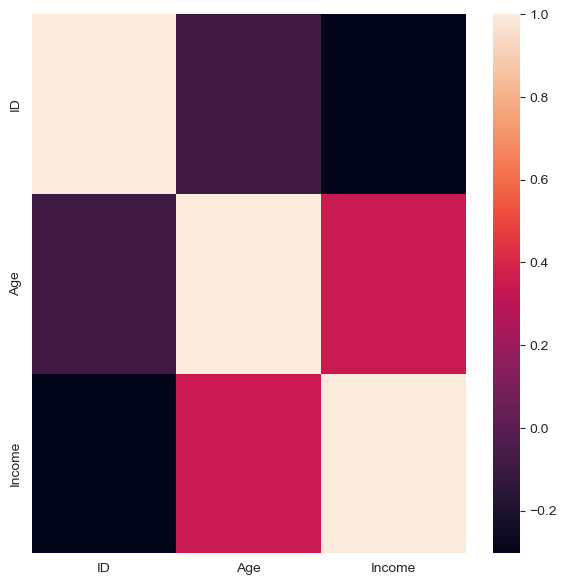

In [190]:
#heat map
plt.figure(figsize=(7,7))
sns.heatmap(df.corr())


**Major questions for our analysis.**

**1. Which customers purchase FMCG frequently?**

With this pie graph we found that most people that most people in our data are from small city, which means in terms settlement size ,these are the people who purchase the most.

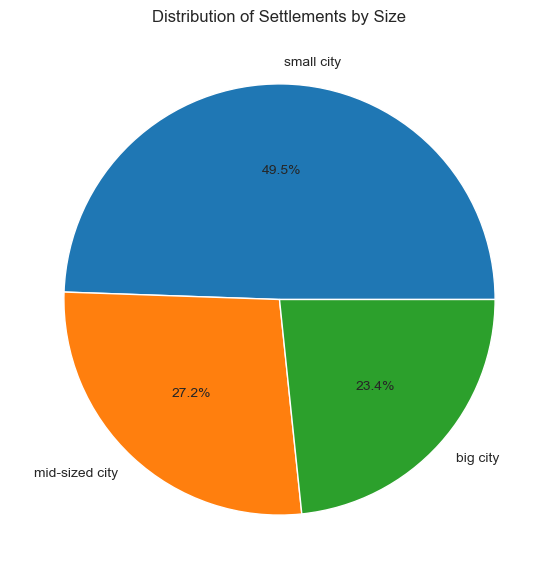

In [209]:
# Create a pie plot
sns.set_style('whitegrid')
plt.figure(figsize=(7,7))
plt.pie(df['Settlement size'].value_counts(), labels=['small city','mid-sized city','big city'], autopct='%1.1f%%')
plt.title('Distribution of Settlements by Size')
plt.show()

According to the bar graph below we discovered most male youth contribute a lot in the FMCG products.

/Users/da_learner_mac_45/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


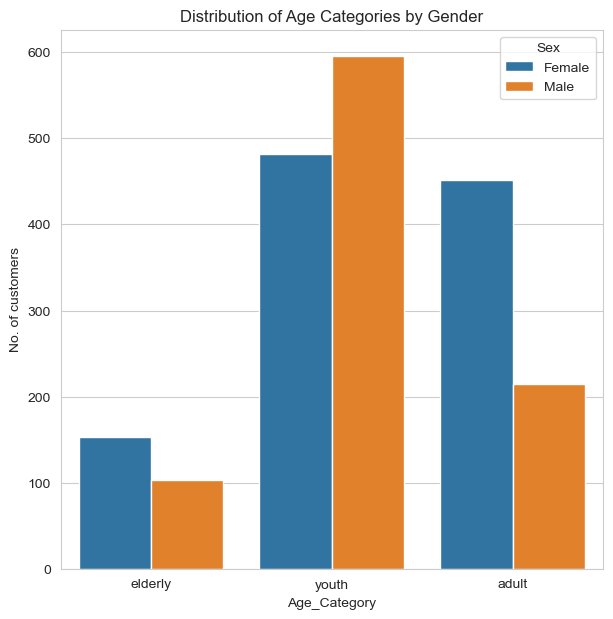

In [210]:
#plot bar graph
plt.figure(figsize=(7,7))
sns.countplot(df['Age_Category'],hue='Sex',data=df)
plt.title('Age category by count')
plt.ylabel('No. of customers')
plt.title('Distribution of Age Categories by Gender')
plt.show()

Based on the graph plotted below we discovered that most youth people(18-35) are from 

<Figure size 700x700 with 0 Axes>

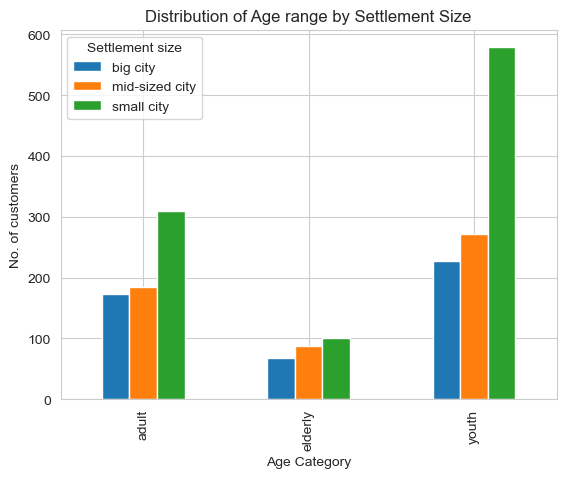

In [212]:
# Create a pivot table that shows the count of each unique combination of Age_Category and Settlement_size
pivot_table = pd.pivot_table(df, values='ID', index='Age_Category', columns='Settlement size', aggfunc='count')
plt.figure(figsize=(7,7))
# Plot the results as a bar chart
pivot_table.plot(kind='bar')
sns.set_style('whitegrid')
plt.xlabel('Age Category')
plt.ylabel('No. of customers')
plt.title('Distribution of Age range by Settlement Size')
plt.xticks(rotation=90)
# Show the chart
plt.show()

The bar graph below shows that most male in the dataset are from small city

/Users/da_learner_mac_45/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


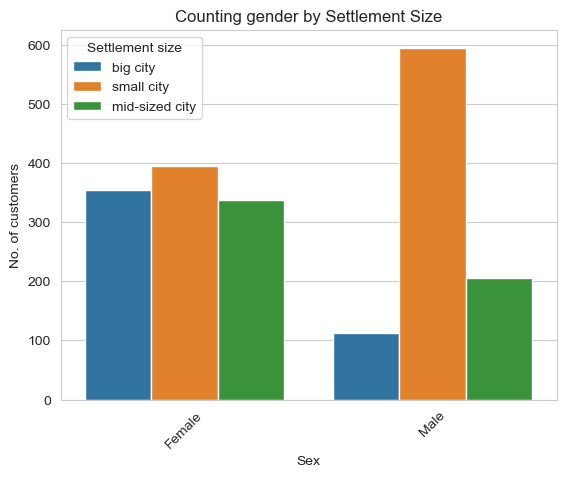

In [213]:
sns.countplot(df['Sex'],hue='Settlement size', data=df)
plt.xticks(rotation=45)
plt.ylabel('No. of customers')
plt.title('Counting gender by Settlement Size')
plt.show()

We also checked the the level of education by age group in the dataset and we found that most of our youth have a highest qualification of high school.

<Figure size 700x700 with 0 Axes>

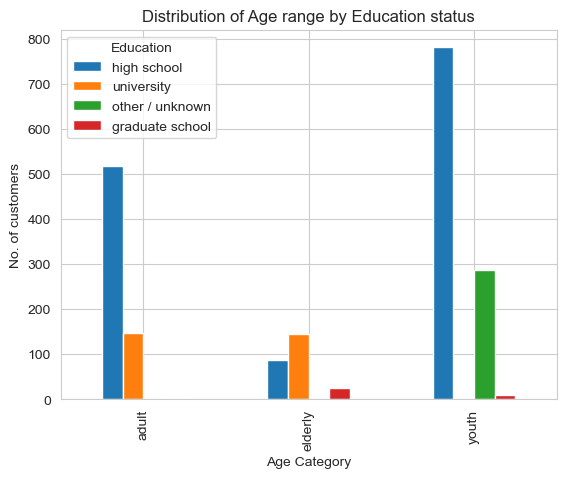

In [222]:
# Create a pivot table that shows the count of each unique combination of Age_Category and Settlement_size
pivot_table = pd.pivot_table(df, values='ID', index='Age_Category', columns='Education', aggfunc='count')
# Sort the columns by count in descending order
pivot_table = pivot_table.reindex(pivot_table.sum().sort_values(ascending=False).index, axis=1)
plt.figure(figsize=(7,7))
# Plot the results as a bar chart
pivot_table.plot(kind='bar')
plt.xlabel('Age Category')
plt.ylabel('No. of customers')
plt.title('Distribution of Age range by Education status')
plt.xticks(rotation=90)
plt.show()


From the graph that we did above we also checked education level of all the customers in the data set and we found that the 69.3% of our customers are high school graduates.

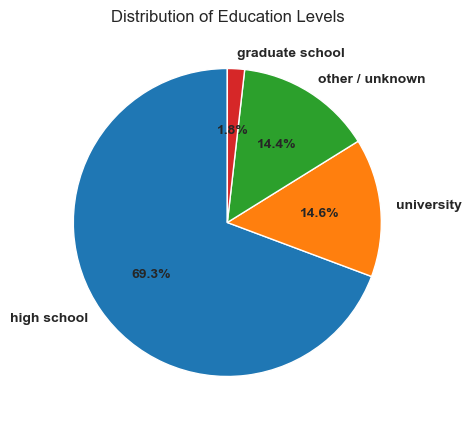

In [215]:
# Create the pie chart with percentages
counts = df['Education'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',textprops={'fontweight': 'bold'},startangle=90, counterclock=True)

plt.xticks(rotate=45)
plt.title('Distribution of Education Levels')

plt.show()

The bar graph below shows the relationship between settlement size and occupation, we found that most unskilled/unemployed people stay in small city.

<Figure size 700x700 with 0 Axes>

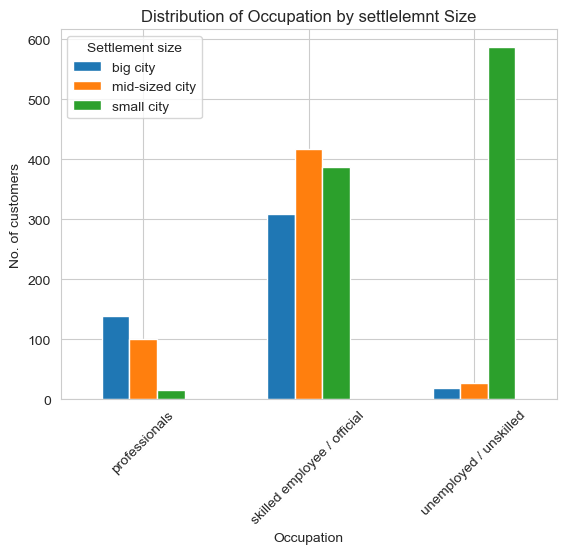

In [216]:
# Create a pivot table that shows the count of each unique combination of Age_Category and Settlement_size
pivot_table = pd.pivot_table(df, values='Income', index='Occupation', columns='Settlement size', aggfunc='count')
plt.figure(figsize=(7,7))
# Plot the results as a bar chart
pivot_table.plot(kind='bar')

# Add labels and title to the chart
sns.set_style('whitegrid')
plt.xlabel('Occupation')
plt.ylabel('No. of customers')
plt.title('Distribution of Occupation by settlelemnt Size')
plt.xticks(rotation=45)
# Show the chart
plt.show()

The graph below shows marital status by age group.

<Figure size 700x700 with 0 Axes>

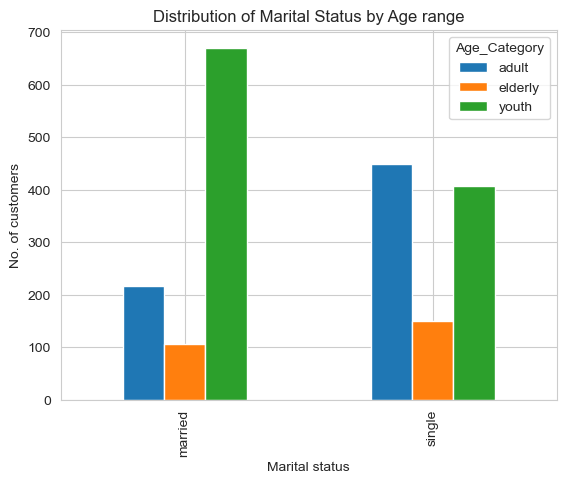

In [217]:
# Create a pivot table that shows the count of each unique combination of Age_Category and Settlement_size
pivot_table = pd.pivot_table(df, values='Sex', index='Marital status', columns='Age_Category', aggfunc='count')
plt.figure(figsize=(7,7))
# Plot the results as a bar chart
pivot_table.plot(kind='bar')

# Add labels and title to the chart
sns.set_style('whitegrid')
plt.xlabel('Marital status')
plt.ylabel('No. of customers')
plt.title('Distribution of Marital Status by Age range')
plt.xticks(rotation=90)
# Show the chart
plt.show()

In conclusion we found that people